In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

colors = pd.read_csv('raw_colors.csv')
print(colors.shape)


(1000, 1874)


          312       937      1537      1562      1563      1587
0                                                              
0.0  0.402209  0.379236  0.000000  0.833312  0.000000  0.000000
0.0  0.419294  0.220647  0.000000  0.880629  0.000000  0.000000
0.0  0.231228  0.298451  0.000000  0.925992  0.000000  0.000000
0.0  0.383834  0.175186  0.000000  0.906632  0.000000  0.000000
0.0  0.208691  0.299582  0.000000  0.930967  0.000000  0.000000
..        ...       ...       ...       ...       ...       ...
0.0  0.160814  0.133133  0.047306  0.780201  0.147035  0.127454
0.0  0.000000  0.000000  0.047006  0.171304  0.146371  0.066285
0.0  0.235234  0.101351  0.071173  0.344948  0.173160  0.072388
0.0  0.036668  0.055441  0.318220  0.662142  0.069138  0.101438
0.0  0.606170  0.133676  0.000000  0.563390  0.058874  0.019379

[1000 rows x 6 columns]


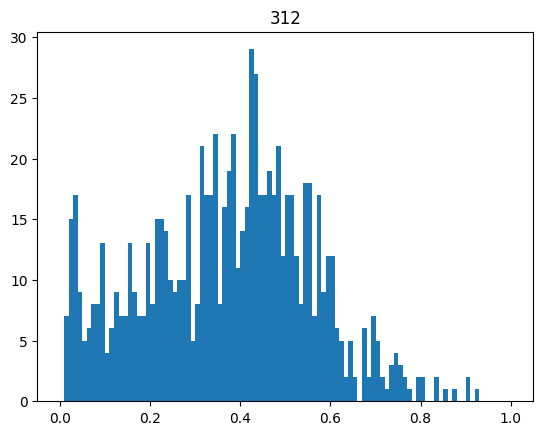

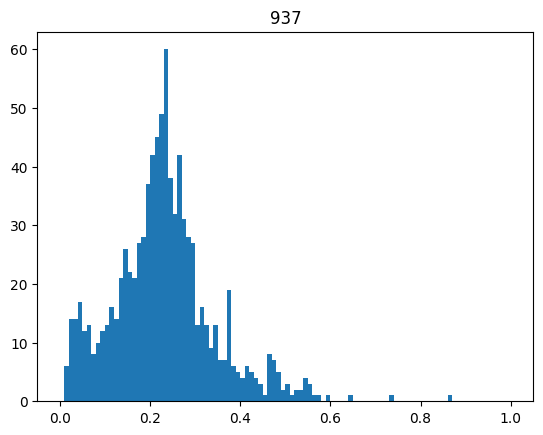

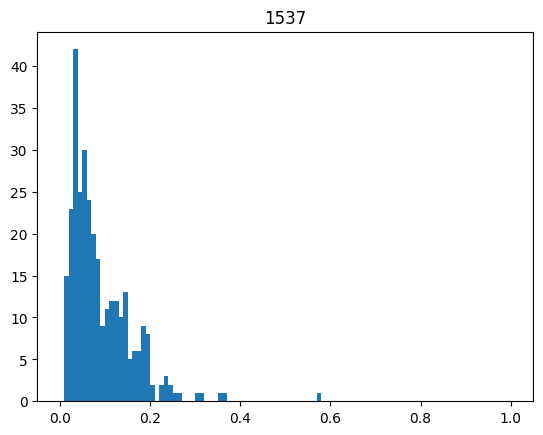

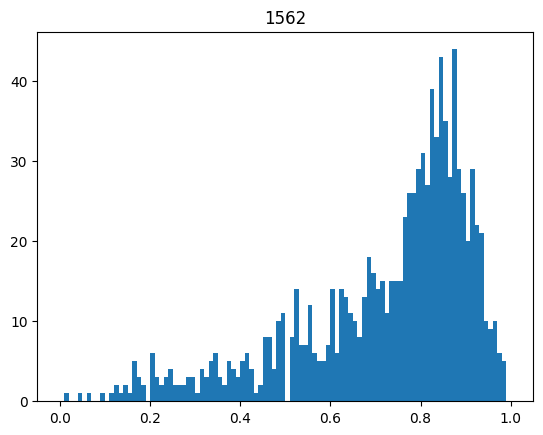

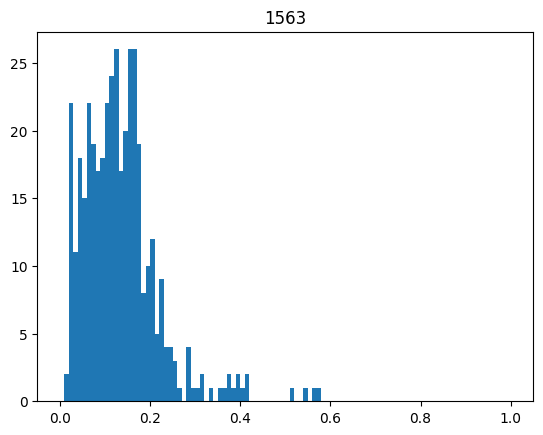

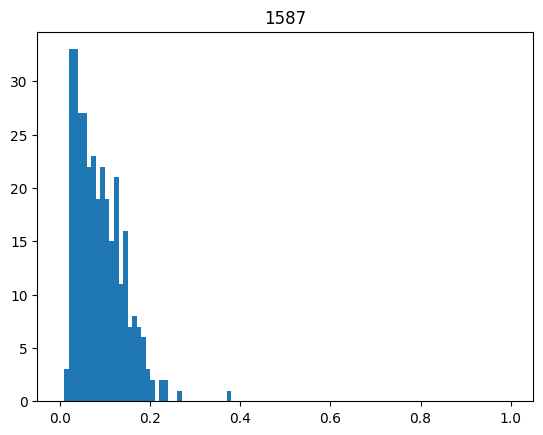

In [12]:
min_count = 300

# Count the number of non-zero entries in each column
color_count = colors.astype(bool).sum(axis=0)

# Filter columns where the count is greater than or equal to 100
relevant_cols = colors.loc[:, color_count >= min_count]

# Print the filtered columns
print(relevant_cols)

# plot the distribution of each col in relevant columns, while removing all the 0 entries
for col in relevant_cols.columns:
    plt.hist(relevant_cols[col][relevant_cols[col] > 0], bins=100, range=(0,1))
    plt.title(col)
    plt.show()


In [ ]:
def og_cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)


0.9882303225255069
0.9861595009366464
0.9778248520523092
0.9782599265033984
0.976325197864016
0.9979998475035223
0.9805711752890383
0.9733348949943113
0.9734408881698731
0.9997330362984497
0.9766292125851124
0.9601526730297831
0.9480367721997294
0.8858904539521787
0.927242417334527
0.8752644253221762
0.9895333479653156
0.9930101732994784
0.9570513753842186
0.9838869012710956
0.9500988675718202
0.9789086695970235
0.9991029533729338
0.9863823783548472
0.9855280685755529
0.9786153047370406
0.9819690720029381
0.9476555065096351
0.9851357610854558
0.9906169161988307
0.9886321765181242
0.9521862704588044
0.9772846187883535
0.9449352185437517
0.9843169557808972
0.9993242788167055
0.9853103711047013
0.9993155084334385
0.9864929844251893
0.9846642260932095
0.9784733806494731
0.9809855928549479
0.9493436986856809
0.9858195139874664
0.9999856098822405
0.986101686650003


In [ ]:
scores = []
for i in range(1000):
    for j in range(i):
        scores.append(og_cosine_similarity(colors.iloc[i], colors.iloc[j]))
    if i % 100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900


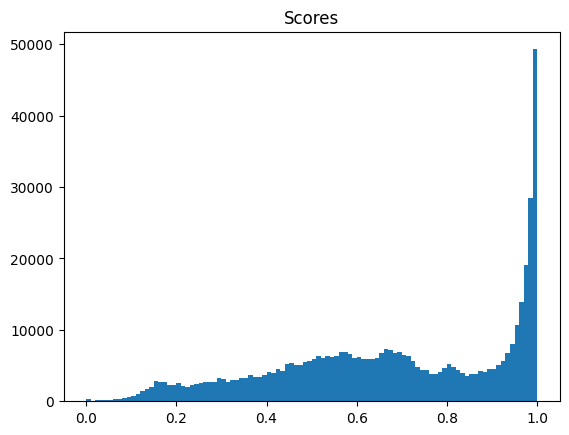

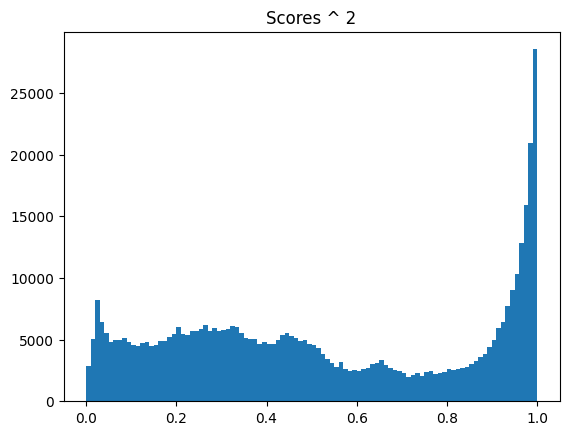

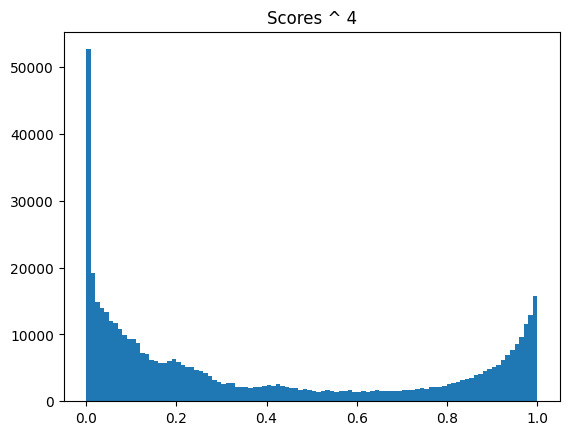

In [9]:
# plot the distribution of scores
scores_np = np.array(scores)
scores2 = scores_np*scores_np
scores4 = scores2*scores2

plt.hist(scores_np, bins=100, range=(0, 1))
plt.title("Scores")
plt.show()

plt.hist(scores2, bins=100, range=(0, 1))
plt.title("Scores ^ 2")
plt.show()

plt.hist(scores4, bins=100, range=(0, 1))
plt.title("Scores ^ 4")
plt.show()

In [6]:
# find the max of each column in colors and put it into a weights np array
max = colors.max().values
max[max == 0] = 1
weights = 1/max

# write weights into weights.txt 
np.savetxt("weights.txt", weights)


In [ ]:
def cosine_similarity(vec1, vec2):
    vec1 = vec1 * weights
    vec2 = vec2 * weights
    
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    score = dot_product / (norm_vec1 * norm_vec2)
    
    return score*score

In [12]:
new_scores = []
for i in range(1000):
    for j in range(i):
        new_scores.append(cosine_similarity(colors.iloc[i], colors.iloc[j]))
    if i % 100 == 0:
        print(i)

0
100
200
300
400
500
600
700
800
900


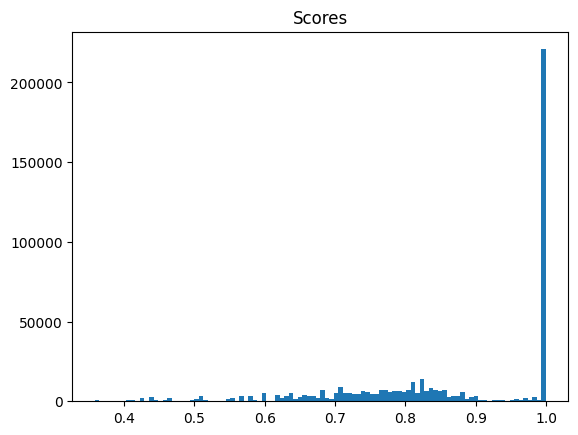

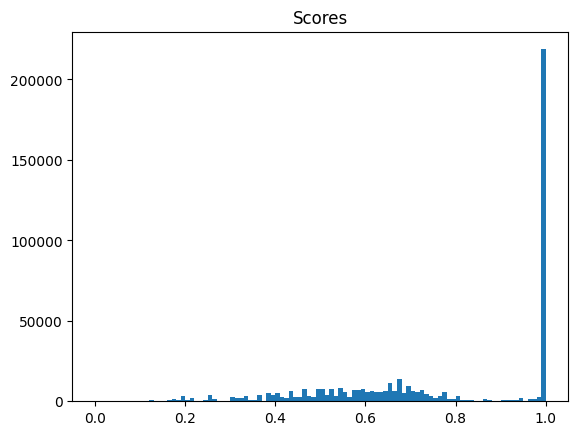

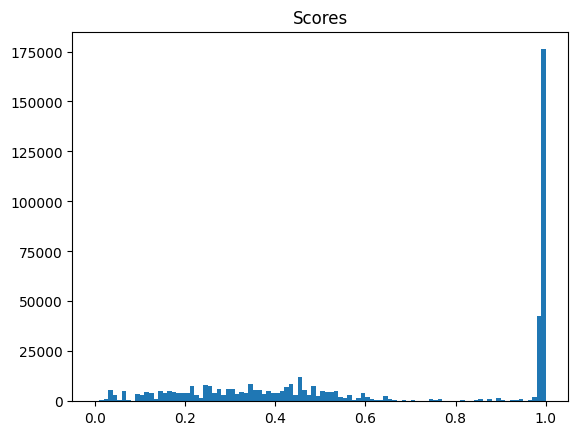

In [13]:
# plot the distribution of scores
scores_np = np.array(new_scores)
scores2 = scores_np*scores_np
scores4 = scores2*scores2

plt.hist(scores_np, bins=100)
plt.title("Scores")
plt.show()

plt.hist(scores2, bins=100, range=(0, 1))
plt.title("Scores")
plt.show()

plt.hist(scores4, bins=100, range=(0, 1))
plt.title("Scores")
plt.show()

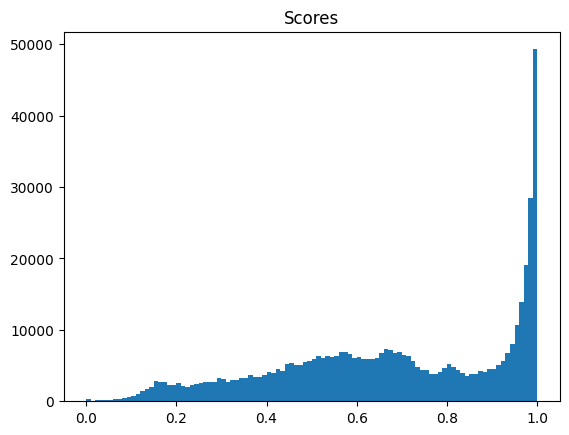

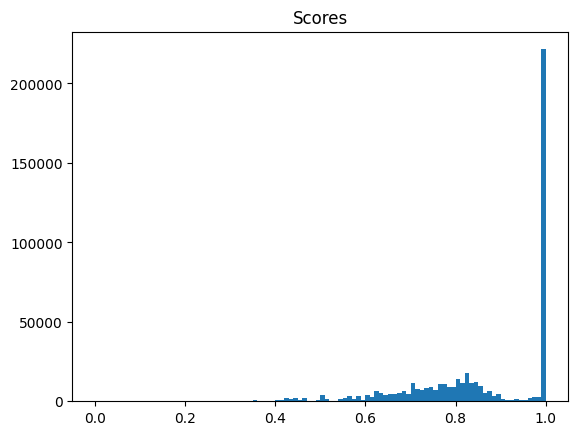

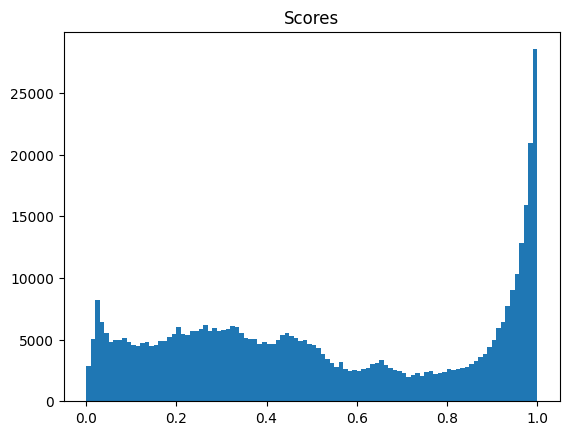

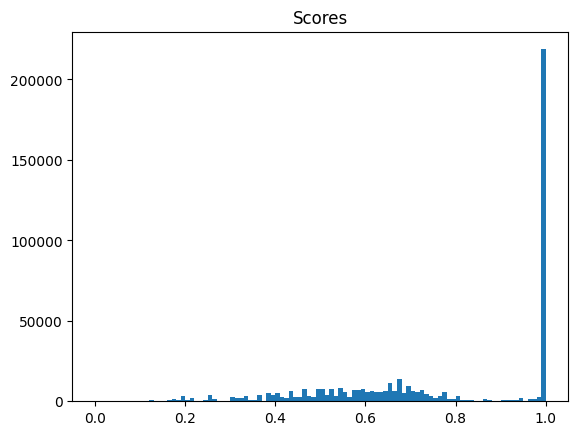

In [14]:
# plot the distribution of scores
scores_np = np.array(scores)
scores2_np = np.array(new_scores)
scores2 = scores_np*scores_np
scores22 = scores2_np*scores2_np

plt.hist(scores_np, bins=100)
plt.title("Scores")
plt.show()

plt.hist(scores2_np, bins=100, range=(0, 1))
plt.title("Scores")
plt.show()

plt.hist(scores2, bins=100)
plt.title("Scores")
plt.show()

plt.hist(scores22, bins=100, range=(0, 1))
plt.title("Scores")
plt.show()
